In [1]:
#@title Everything in Part 1 copied over

!pip install -U -q PyDrive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import defaultdict

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

stockData = drive.CreateFile({'id':"1Gtf_20aW4H81JRwjvdKozlF49sXpZzID"}) 
stockData.GetContentFile('stock_data.csv')
cleaned_data = pd.read_csv('stock_data.csv')
cleaned_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Sentiment
0,kicker on my watchlist xide tit soq pnk cpw bp...,1
1,user aap movie return for the fea geed indicat...,1
2,user i d be afraid to short amzn they are look...,1
3,mnta over,1
4,oi over,1


In [2]:
X = cleaned_data['Text']
y = cleaned_data['Sentiment']

vec = CountVectorizer(max_features=4000)
X = vec.fit_transform(X).toarray()

pca = PCA(n_components=256)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1 align="center">Logistic Regression</h1>

<img src="https://miro.medium.com/v2/resize:fit:0/1*klFuUpBGVAjTfpTak2HhUA.png" align="left">

Remember how in linear regression, we wanted to fit a straight line through the data points? This is similar, except we want to fit the optimal sigmoid function given by the formula 
$\hat{y}=\frac{1}{1+e^{w^Tx+b}}$. This is typically used more often in classification models, so we predict that our optimal logistic regression model will perform better than our linear regression model.


In [12]:
model = LogisticRegression(penalty=None)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Logistic Regression Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Logistic Regression Accuracy: 0.7566867989646247


Here, we test the hyperparemeter regularization strength, which is similar to the alpha in linear regression. 

In [11]:
Cs = np.linspace(0.01,2,200)
res = []

for i in Cs:
  model = LogisticRegression(penalty='l2',C=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  res.append(accuracy_score(y_test,y_pred))


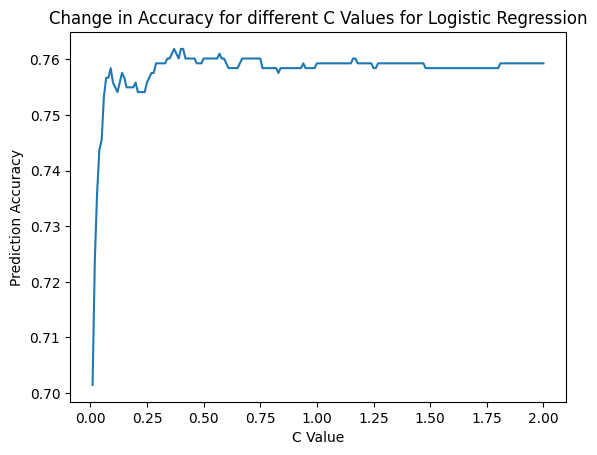

In [13]:
'''
Plotting the error over the different alphas
'''
plt.title('Change in Accuracy for different C Values for Logistic Regression')
plt.xlabel('C Value')
plt.ylabel('Prediction Accuracy')
 
plt.plot(Cs,res)

Here, we see that the optimal C Value is when it is around 0.45, which does perform better than that without any regularization. What's surprisingly is that it performed roughly as well as the Ridge Classifer, which also ran a lot quicker, since it makes a lot less computations. 